In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes, load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [2]:
# Load diabetes dataset
diabetes = load_diabetes()
X_diabetes = diabetes.data
y_diabetes = diabetes.target

# Load cancer dataset
cancer = load_breast_cancer()
X_cancer = cancer.data
y_cancer = cancer.target

In [3]:
# Standardize the data
scaler_diabetes = StandardScaler()
X_diabetes_scaled = scaler_diabetes.fit_transform(X_diabetes)

# Apply PCA
pca_diabetes = PCA(n_components=2)
X_diabetes_pca = pca_diabetes.fit_transform(X_diabetes_scaled)

# Apply LDA
lda_diabetes = LinearDiscriminantAnalysis(n_components=2)
X_diabetes_lda = lda_diabetes.fit_transform(X_diabetes_scaled, y_diabetes)

# Check PCA components
print("PCA Components (Diabetes):\n", pca_diabetes.components_)

# Check LDA components
print("LDA Components (Diabetes):\n", lda_diabetes.coef_)


PCA Components (Diabetes):
 [[ 0.21643101  0.18696711  0.3031625   0.2717397   0.34325493  0.35186062
  -0.28243639  0.42883325  0.37861731  0.32218282]
 [ 0.04437151 -0.38654811 -0.15628061 -0.13825564  0.57302669  0.45593985
   0.50624287 -0.06818423 -0.0261893  -0.0849466 ]]
LDA Components (Diabetes):
 [[-9.21101068e-02 -1.01260673e+00 -1.41864050e-01 ... -1.25223621e+00
   9.90163440e-01 -5.06910689e-01]
 [ 1.20855454e+00 -5.32042656e-01  4.71635228e-01 ... -2.56506331e+00
  -5.02893357e+00 -6.39294501e-01]
 [ 2.01974893e-01 -2.17862289e-01 -8.61953592e-01 ...  2.41691675e+00
  -9.07413963e-01 -6.76829845e-01]
 ...
 [ 8.48888970e-04  6.43683467e-01  3.50807515e+00 ... -2.88220307e-01
   2.76303036e+00  9.51368620e-01]
 [ 9.15407700e-01 -3.13357539e-01  4.20510691e+00 ...  1.17669113e+01
   1.43457608e+00 -5.03099454e-01]
 [-1.04285546e+00 -1.17419639e+00  5.97565900e+00 ...  3.38306283e+00
   3.04252897e+00  2.49158467e-01]]


PCA Components (Cancer):
 [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]
LDA Components (Cancer):
 [[ 1.44833568e+01 -3.68957962e-01 -1.08865782e+01 -2.11087855e+00
  -2.24784150e-02  4.20809820e+00 -2.10328313e+00 -1.56846323e+00
  -5.31387551e-02 -4.43195602e-03 -2.27635626e+00  7.03616573e-02
   8.593

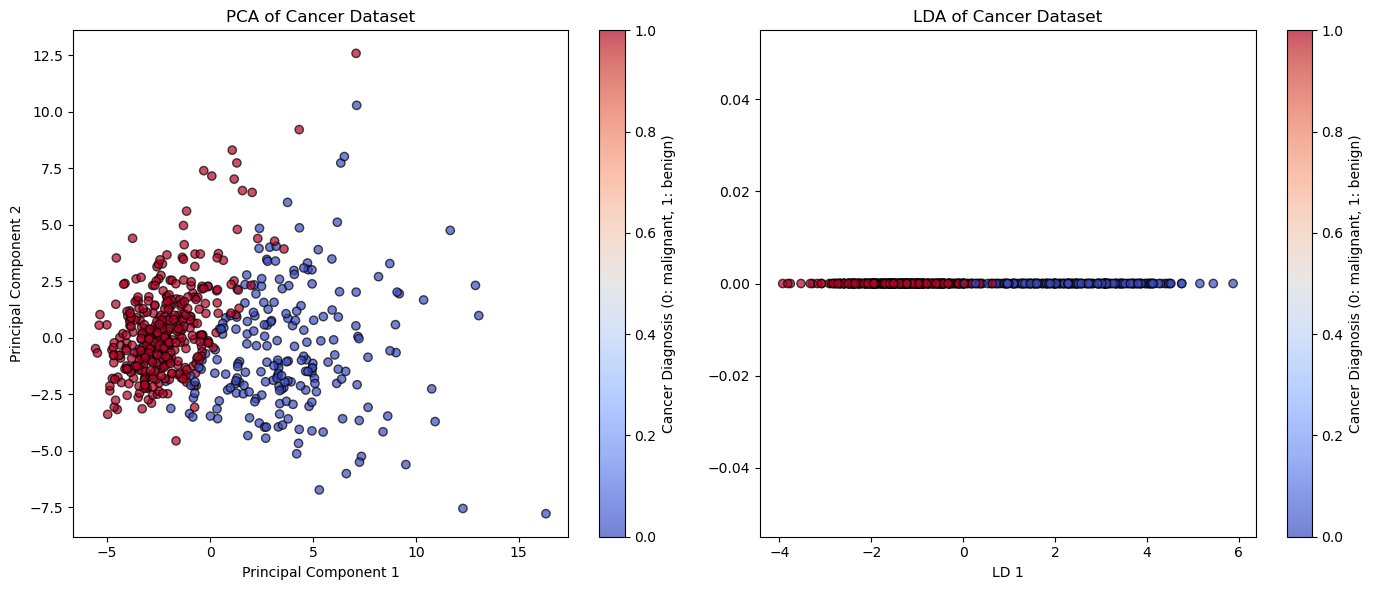

PCA Variance Ratio (Cancer): [0.44272026 0.18971182]
LDA Variance Ratio (Cancer): Only 1 component used, no variance ratio calculated.


In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load cancer dataset
cancer = load_breast_cancer()
X_cancer = cancer.data
y_cancer = cancer.target

# Standardize the data
scaler_cancer = StandardScaler()
X_cancer_scaled = scaler_cancer.fit_transform(X_cancer)

# Apply PCA
pca_cancer = PCA(n_components=2)
X_cancer_pca = pca_cancer.fit_transform(X_cancer_scaled)

# Apply LDA
lda_cancer = LinearDiscriminantAnalysis(n_components=1)  # Correct number of components
X_cancer_lda = lda_cancer.fit_transform(X_cancer_scaled, y_cancer)

# Check PCA components
print("PCA Components (Cancer):\n", pca_cancer.components_)

# Check LDA components
print("LDA Components (Cancer):\n", lda_cancer.coef_)

# Plot PCA results
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_cancer_pca[:, 0], X_cancer_pca[:, 1], c=y_cancer, cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.colorbar(label='Cancer Diagnosis (0: malignant, 1: benign)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Cancer Dataset')

# Plot LDA results
plt.subplot(1, 2, 2)
plt.scatter(X_cancer_lda[:, 0], np.zeros_like(X_cancer_lda[:, 0]), c=y_cancer, cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.colorbar(label='Cancer Diagnosis (0: malignant, 1: benign)')
plt.xlabel('LD 1')
plt.title('LDA of Cancer Dataset')

plt.tight_layout()
plt.show()

# Calculate Variance Ratio for PCA
pca_var_ratio_cancer = pca_cancer.explained_variance_ratio_
print("PCA Variance Ratio (Cancer):", pca_var_ratio_cancer)

# LDA doesn't have explained_variance_ratio_ directly accessible, so we'll just note the number of components used.
print("LDA Variance Ratio (Cancer): Only 1 component used, no variance ratio calculated.")


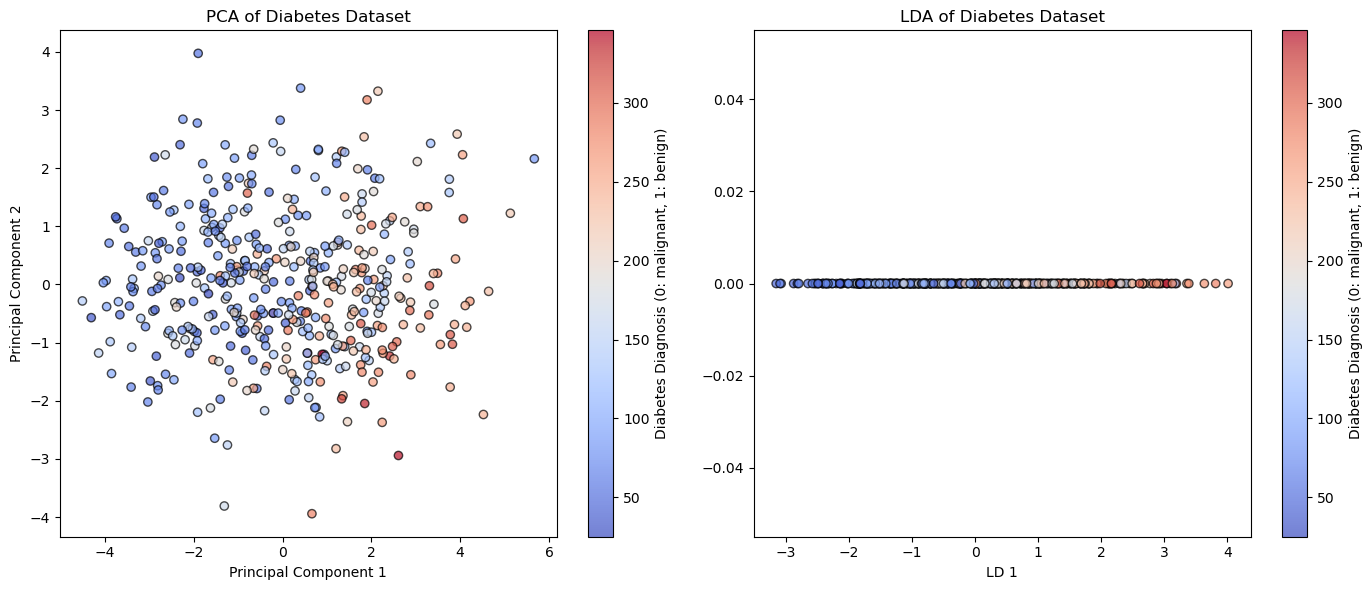

PCA Variance Ratio (diabetes): [0.40242142 0.14923182]
LDA Variance Ratio (diabetes): Only 1 component used, no variance ratio calculated.


In [5]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_diabetes_pca[:, 0], X_diabetes_pca[:, 1], c=y_diabetes, cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.colorbar(label='Diabetes Diagnosis (0: malignant, 1: benign)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Diabetes Dataset')

# Plot LDA results
plt.subplot(1, 2, 2)
plt.scatter(X_diabetes_lda[:, 0], np.zeros_like(X_diabetes_lda[:, 0]), c=y_diabetes, cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.colorbar(label='Diabetes Diagnosis (0: malignant, 1: benign)')
plt.xlabel('LD 1')
plt.title('LDA of Diabetes Dataset')

plt.tight_layout()
plt.show()

# Calculate Variance Ratio for PCA
pca_var_ratio_diabetes = pca_diabetes.explained_variance_ratio_
print("PCA Variance Ratio (diabetes):", pca_var_ratio_diabetes)

# LDA doesn't have explained_variance_ratio_ directly accessible, so we'll just note the number of components used.
print("LDA Variance Ratio (diabetes): Only 1 component used, no variance ratio calculated.")